In [1]:
# Load modules for data manipulation
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import call
import pandas as pd
import numpy as np
import time
import os

In [2]:
# Load modules for machine learning
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Calculate the accurancy of the model
from sklearn.metrics import accuracy_score, classification_report

# For drawing the graph
from sklearn.tree import export_graphviz

# will be used for tree visualization
from dtreeviz.trees import dtreeviz

In [3]:
load_dotenv()

True

In [4]:
# Declare the list of products for each family
# Les familles sont: CREDITS, DEPOTS MONETAIRES, PRODUITS EXTERNES COMMERCIALISES
credit = ['00568', '00943', '00942', '00546', '00547', '03992', '00940', '00941', '00548', '06458', '00509', '00565']
depot = ['07648', '07649', '07606', '00003']
comm = ['05808', '05807']

In [5]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature name logistic regressions
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '-FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    plt.savefig('{}.svg'.format(model_type))

In [6]:
# Get the data from the other notebook
%store -r data
%store -r columns
%store -r eco
%store -r ctr

# -------------------------------------------------------------------------------------------------------------

# Statistics

## Single

In [7]:
data.shape

(580778, 126)

### Eco

In [8]:
print(data['ECO'].value_counts())

False    424185
True     156593
Name: ECO, dtype: int64


### Sexe

In [9]:
print(data['COSEXE'].value_counts())

1    298055
0    282723
Name: COSEXE, dtype: int64


### Age

In [10]:
print('0-14 ::', data[(0 <= data['QTAGCL']) & (data['QTAGCL'] <= 14)]['COSEXE'].count())
print('15-29 ::', data[(15 <= data['QTAGCL']) & (data['QTAGCL'] <= 29)]['COSEXE'].count())
print('30-44 ::', data[(30 <= data['QTAGCL']) & (data['QTAGCL'] <= 44)]['COSEXE'].count())
print('45-59 ::', data[(45 <= data['QTAGCL']) & (data['QTAGCL'] <= 59)]['COSEXE'].count())
print('60-74 ::', data[(60 <= data['QTAGCL']) & (data['QTAGCL'] <= 74)]['COSEXE'].count())
print('75-~ ::', data[75 <= data['QTAGCL']]['COSEXE'].count())

0-14 :: 90670
15-29 :: 94889
30-44 :: 115920
45-59 :: 121305
60-74 :: 105068
75-~ :: 52926


In [11]:
pd.DataFrame(data['QTAGCL'].describe())

,QTAGCL
count,580778.000000
mean,42.499341
std,23.679098
min,0.000000
25%,23.000000
50%,43.000000
75%,61.000000
max,110.000000


In [12]:
print(data['QTAGCL'].median())
print(data['QTAGCL'].mode())

43.0
0    43.0
dtype: float64


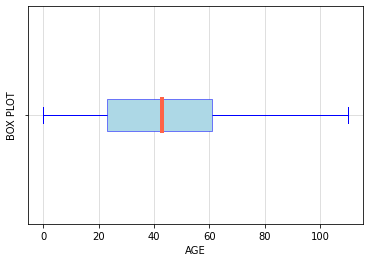

In [13]:
bp = plt.boxplot(data['QTAGCL'], vert=False, patch_artist=True)
plt.yticks([1], [''])

plt.setp(bp['caps'],color='blue',alpha=1)
plt.setp(bp['whiskers'],color='blue',alpha=1)
plt.setp(bp['medians'],color='tomato',alpha=1,linewidth=4.0)
plt.setp(bp['boxes'], color='blue', facecolor='lightblue',alpha=1,linewidth=0.5)

plt.xlabel('AGE')
plt.ylabel('BOX PLOT')

plt.grid(alpha=0.5)
plt.savefig("../graphs/age_box.png", dpi = 300)

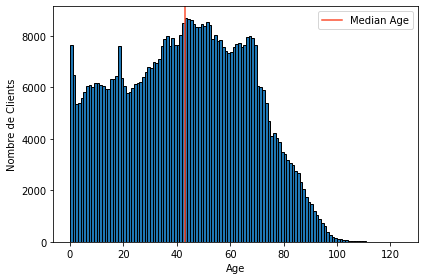

In [14]:
bins = [i for i in range(125)]
plt.hist(data['QTAGCL'], bins=bins, edgecolor='black')
plt.axvline(data['QTAGCL'].median(), color='#FC4F30', label='Median Age')

plt.xlabel('Age')
plt.ylabel('Nombre de Clients')
plt.legend()
plt.tight_layout()
plt.savefig("../graphs/age_hist.png", dpi = 300)

### CTSCPI

In [15]:
data.CTSCPI.nunique()

53

In [16]:
ctscpi = data['CTSCPI'].value_counts()
ctscpi = list(zip(ctscpi.index, ctscpi.values))

In [17]:
for temp in ctscpi:
    print('INSEE: {}, COUNT: {}, %: {:.3}.'.format(temp[0], temp[1], temp[1] / data.shape[0] * 100))

INSEE: 8400.0, COUNT: 119489, %: 20.6.
INSEE: 7600.0, COUNT: 56987, %: 9.81.
INSEE: 8500.0, COUNT: 55329, %: 9.53.
INSEE: 5400.0, COUNT: 32460, %: 5.59.
INSEE: 7300.0, COUNT: 32052, %: 5.52.
INSEE: 5200.0, COUNT: 29908, %: 5.15.
INSEE: 8600.0, COUNT: 27565, %: 4.75.
INSEE: 5500.0, COUNT: 21119, %: 3.64.
INSEE: 4200.0, COUNT: 18018, %: 3.1.
INSEE: 5600.0, COUNT: 15557, %: 2.68.
INSEE: 4300.0, COUNT: 14145, %: 2.44.
INSEE: 2300.0, COUNT: 14027, %: 2.42.
INSEE: 6300.0, COUNT: 13798, %: 2.38.
INSEE: 7200.0, COUNT: 12598, %: 2.17.
INSEE: 3400.0, COUNT: 12191, %: 2.1.
INSEE: 3700.0, COUNT: 12094, %: 2.08.
INSEE: 4600.0, COUNT: 12090, %: 2.08.
INSEE: 4700.0, COUNT: 11771, %: 2.03.
INSEE: 8100.0, COUNT: 11071, %: 1.91.
INSEE: 5300.0, COUNT: 7534, %: 1.3.
INSEE: 6200.0, COUNT: 7107, %: 1.22.
INSEE: 6400.0, COUNT: 4940, %: 0.851.
INSEE: 3300.0, COUNT: 4895, %: 0.843.
INSEE: 7500.0, COUNT: 3950, %: 0.68.
INSEE: 6900.0, COUNT: 3565, %: 0.614.
INSEE: 4500.0, COUNT: 3267, %: 0.563.
INSEE: 6800.0, CO

## Double

### Age Sexe

In [18]:
kill = 258539
who = 1
temp = data[(0 <= data['QTAGCL']) & (data['QTAGCL'] <= 14) & (data['COSEXE'] == who)]['COSEXE'].count()
print('0-14 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(15 <= data['QTAGCL']) & (data['QTAGCL'] <= 29) & (data['COSEXE'] == who)]['COSEXE'].count()
print('15-29 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(30 <= data['QTAGCL']) & (data['QTAGCL'] <= 44) & (data['COSEXE'] == who)]['COSEXE'].count()
print('30-44 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(45 <= data['QTAGCL']) & (data['QTAGCL'] <= 59) & (data['COSEXE'] == who)]['COSEXE'].count()
print('45-59 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(60 <= data['QTAGCL']) & (data['QTAGCL'] <= 74) & (data['COSEXE'] == who)]['COSEXE'].count()
print('60-74 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(75 <= data['QTAGCL']) & (data['COSEXE'] == who)]['COSEXE'].count()
print('75-~ & {} & {}'.format(temp, round(temp / kill * 100, 2)))

0-14 & 44323 & 17.14
15-29 & 47084 & 18.21
30-44 & 58862 & 22.77
45-59 & 62600 & 24.21
60-74 & 54851 & 21.22
75-~ & 30335 & 11.73


### Eco Sexe

In [19]:
# lol = ['COSEXE', 'QTAGCL', 'CTSCPI']
print(data.groupby('ECO')['COSEXE'].value_counts())

ECO    COSEXE
False  1         214811
       0         209374
True   1          83244
       0          73349
Name: COSEXE, dtype: int64


### Eco Age

In [20]:
kill = 346365
isit = False

temp = data[(0 <= data['QTAGCL']) & (data['QTAGCL'] <= 14) & (data['ECO'] == isit)]['COSEXE'].count()
print('0-14 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(15 <= data['QTAGCL']) & (data['QTAGCL'] <= 29) & (data['ECO'] == isit)]['COSEXE'].count()
print('15-29 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(30 <= data['QTAGCL']) & (data['QTAGCL'] <= 44) & (data['ECO'] == isit)]['COSEXE'].count()
print('30-44 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(45 <= data['QTAGCL']) & (data['QTAGCL'] <= 59) & (data['ECO'] == isit)]['COSEXE'].count()
print('45-59 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(60 <= data['QTAGCL']) & (data['QTAGCL'] <= 74) & (data['ECO'] == isit)]['COSEXE'].count()
print('60-74 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(75 <= data['QTAGCL']) & (data['COSEXE'] == who)]['ECO'].count()
print('75-~ & {} & {}'.format(temp, round(temp / kill * 100, 2)))

0-14 & 90558 & 26.15
15-29 & 81681 & 23.58
30-44 & 81159 & 23.43
45-59 & 76323 & 22.04
60-74 & 61549 & 17.77
75-~ & 30335 & 8.76
